Metody Probabilistyczne i Statystyka
Zadanie 1

In [1]:
using Distributions
using Plots
using StatsPlots
using LaTeXStrings
using JLD2, FileIO
import Random
import Base.Iterators: flatten
Random.Xoshiro(42) # seed


Random.Xoshiro(0xa379de7eeeb2a4e8, 0x953dccb6b532b3af, 0xf597b8ff8cfd652a, 0xccd7337c571680d1)

In [2]:
struct BallsnBinsStats
    n::Int64 # number of bins
    B::Int64 # birthday paradox
    U::Int64 # empty bins after n balls
    L::Int64 # maximum load after n balls
    C::Int64 # every bin has at least one ball
    D::Int64 # every bin has at least two balls
end

In [3]:
function balls_and_bins(n)
    """
    Simulates the balls and bins problem.
    """
    bins = zeros(Int, n)

    Bₙ = Uₙ = Lₙ = Cₙ = Dₙ = 0
    m = 0
    while Dₙ == 0
        m += 1

        bin_number = rand(DiscreteUniform(1, n))
        bins[bin_number] += 1

        if Bₙ == 0 && bins[bin_number] == 2
            Bₙ = m
        end
        if m == n
            Uₙ = count(b -> b == 0, bins)
            Lₙ = maximum(bins)
        end
        if Cₙ == 0 && bins[bin_number] == 1 && all(b -> b >= 1, bins)
            Cₙ = m
        end
        if Cₙ != 0 && bins[bin_number] == 2 && all(b -> b >= 2, bins)
            Dₙ = m
        end
    end
    return BallsnBinsStats(n, Bₙ, Uₙ, Lₙ, Cₙ, Dₙ)
end

balls_and_bins (generic function with 1 method)

In [6]:
n = 1000:1000:100_000
k = 50
results = [balls_and_bins(i) for i in n, _ in 1:k]

b = mean([r.B for r in results], dims=2)
u = mean([r.U for r in results], dims=2)
l = mean([r.L for r in results], dims=2)
c = mean([r.C for r in results], dims=2)
d = mean([r.D for r in results], dims=2)

100×1 Matrix{Float64}:
   9671.2
  21462.7
  32738.04
  46196.14
  56695.22
  72850.02
  84176.2
  96730.14
 112558.16
 124905.72
      ⋮
      1.37174312e6
      1.37291732e6
      1.42062334e6
      1.40412122e6
      1.42308934e6
      1.4737433e6
      1.41616156e6
      1.50978172e6
      1.53733078e6

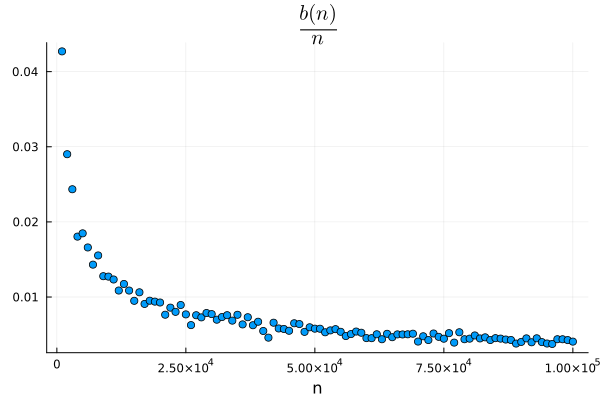

In [7]:
scatter(n, b ./ n, xlabel="n", label=:none, title=L"\frac{b(n)}{n}")

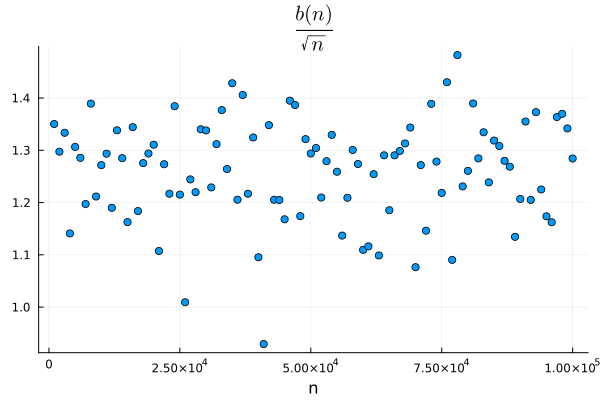

In [8]:
scatter(n, b ./ sqrt.(n), xlabel="n", label=:none, title=L"\frac{b(n)}{\sqrt{n}}")

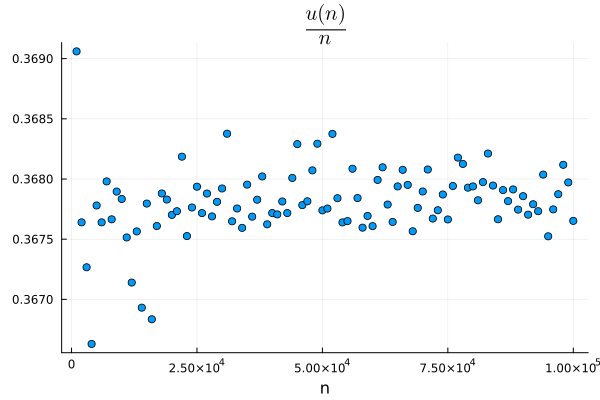

In [9]:
scatter(n, u ./ n, xlabel="n", label=:none, title=L"\frac{u(n)}{n}")

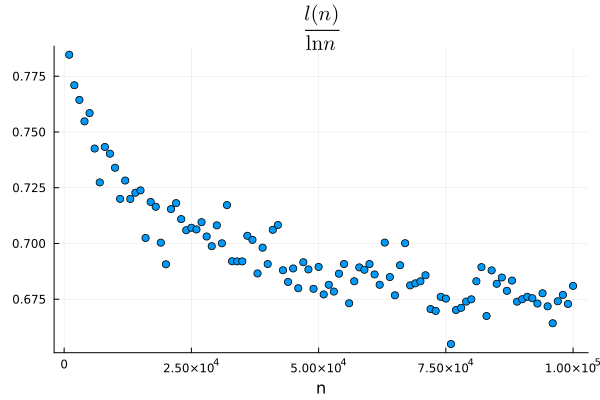

In [10]:
scatter(n, l ./ log.(n), xlabel="n", label=:none, title=L"\frac{l(n)}{\ln{n}}")

In [ ]:
scatter(n, l ./ log.(n), xlabel="n", label=:none, title=L"\frac{l(n)}{\ln{n}}")